## SuperMario Frames Preprocessing

In [1]:
import gym_super_mario_bros as gym
import matplotlib.pyplot as plt

env = gym.make('SuperMarioBros-v0')
state = env.reset()
plt.imshow(state)
plt.show()
print(f'image of size {state.shape[0]}x{state.shape[1]}')

<Figure size 640x480 with 1 Axes>

image of size 240x256


The idea is to highlight Mario, cut the top part of the frame and make background darker

<class 'numpy.ndarray'>


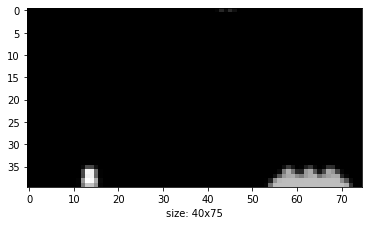

In [7]:
import torchvision
from supermario_dqn.preprocess import *
from torchvision import transforms
import numpy as np

state_ = preprocess(state, 40, 75)
print(type(state))
plt.imshow(state_, cmap='gray')
plt.xlabel(f'size: {state_.shape[0]}x{state_.shape[1]}')
plt.show()

Neural Network will be feed with a 3x60x110 frame containing 3 frames

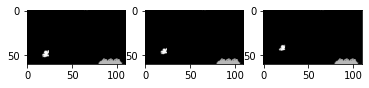

In [33]:
from collections import deque
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
from nes_py.wrappers import JoypadSpace 

env = gym.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

env.reset()
action = 2

# init
for i in range(4):
    env.step(action)[0]
    
for i in range(3):
    state = None
    for j in range(2):
        state = env.step(action)[0]
        
    plt.subplot(1, 3, i+1)
    plt.imshow(preprocess(frames[i], 40, 75), cmap='gray')
    
plt.show()

In [12]:
print(SIMPLE_MOVEMENT)

[['NOOP'], ['right'], ['right', 'A'], ['right', 'B'], ['right', 'A', 'B'], ['A'], ['left']]


example of random exploration

In [40]:
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
from nes_py.wrappers import JoypadSpace 
from IPython.display import clear_output
import random
from collections import deque

env = gym.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

env.reset()
done = False
reward = 0
step = 0
pos = deque([], 3)
while not done:
    
    action = env.action_space.sample()
    obs, r, done, info = env.step(action)
    reward += r
    step += 1
    pos.append(info['x_pos'])
    
    if step % 3 == 0:
        clear_output(wait=True)
        plt.imshow(preprocess(obs, 30, 55), cmap='gray')
        plt.xlabel(f'r: {r}, x_pos: {info["x_pos"]}')
        plt.show()
    
print(f'random reward: {reward}')
print(f'{step} steps')

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>